In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam










2024-05-08 18:10:25.344607: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-08 18:10:25.344739: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-08 18:10:25.616568: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Constants
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
BATCH_SIZE = 20
EPOCHS = 20

# Data directories
train_dir = "/kaggle/input/covid-xray/covid data/train"
test_dir = "/kaggle/input/covid-xray/covid data/test"

In [3]:

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)



train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=20,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=20,
    class_mode='categorical'
)


Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [5]:
# Model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='tanh'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# history = model.fit(
#     train_generator,
#     steps_per_epoch=len(train_images) // BATCH_SIZE,
#     epochs=EPOCHS,
#     validation_data=(val_images, val_labels)
# )


history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    epochs=20,
                    validation_data=test_generator,
                    validation_steps=test_generator.samples // test_generator.batch_size)


Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 1/12 ━━━━━━━━━━━━━━━━━━━━ 3:16 18s/step - accuracy: 0.4000 - loss: 1.0848

I0000 00:00:1715191941.907272     121 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1715191941.926844     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 2/12 ━━━━━━━━━━━━━━━━━━━━ 48s 5s/step - accuracy: 0.4097 - loss: 1.1833  

W0000 00:00:1715191946.818897     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


10/12 ━━━━━━━━━━━━━━━━━━━━ 1s 760ms/step - accuracy: 0.3593 - loss: 1.1758

W0000 00:00:1715191950.858848     122 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


12/12 ━━━━━━━━━━━━━━━━━━━━ 27s 844ms/step - accuracy: 0.3631 - loss: 1.1639 - val_accuracy: 0.6000 - val_loss: 1.0494
Epoch 2/20
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6000 - loss: 1.0649

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.6000 - loss: 1.0649 - val_accuracy: 0.3333 - val_loss: 1.0466
Epoch 3/20


W0000 00:00:1715191952.400226     119 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 303ms/step - accuracy: 0.5370 - loss: 0.9752 - val_accuracy: 0.6833 - val_loss: 0.8630
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7500 - loss: 0.6214 - val_accuracy: 0.5000 - val_loss: 1.2036
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 287ms/step - accuracy: 0.7567 - loss: 0.5621 - val_accuracy: 0.8333 - val_loss: 0.4617
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9000 - loss: 0.4650 - val_accuracy: 1.0000 - val_loss: 0.2969
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 260ms/step - accuracy: 0.8178 - loss: 0.4284 - val_accuracy: 0.8667 - val_loss: 0.4150
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8500 - loss: 0.4928 - val_accuracy: 1.0000 - val_loss: 0.1108
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 257ms/step - accuracy: 0.9160 - loss: 0.2552 - val_accuracy: 0.8167 - val_loss: 0.3992
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9500 - loss: 0.1146 - val_accuracy: 0.6667 - val_loss: 0

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - accuracy: 0.9030 - loss: 0.1636
Test Accuracy: 0.9242424368858337


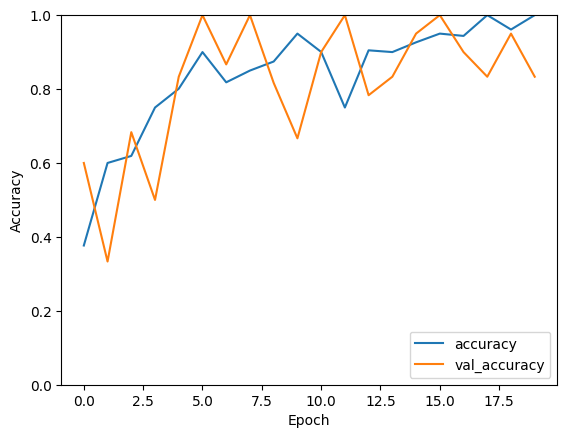

In [6]:

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)

# Plot results
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [24]:
import cv2
from tensorflow.keras.models import load_model

# Load the trained model
#model = load_model("path/to/saved/model")

# Preprocess the input X-ray image
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT))
    image = image / 255.0  # Normalize pixel values
    return image.reshape(1, IMAGE_WIDTH, IMAGE_HEIGHT, 3)  # Reshape for model input

# Path to the chest X-ray image you want to predict
image_path = "/kaggle/input/my-lungs/me/ME1.jpg"

# Preprocess the image
preprocessed_image = preprocess_image(image_path)

# Make predictions
predictions = model.predict(preprocessed_image)

# Get the predicted class index and probability
predicted_class_index = predictions.argmax()
predicted_probability = predictions.max()

# Output the prediction
print("Predicted Class Index:", predicted_class_index)
print("Predicted Probability:", predicted_probability)

category_map = {0: "Covid", 1: "Normal", 2: "Viral Pneumonia"}
predicted_category = category_map[predictions.argmax()]

# Output the prediction
print("Predicted Category:", predicted_category)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class Index: 0
Predicted Probability: 0.9841087
Predicted Category: Covid
